In [56]:
#loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('/content/Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
df['Species'].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [9]:
df = pd.get_dummies(df, columns=['Species'], drop_first=True)


In [10]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False


In [25]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(y >= Q1 - 1.5*IQR) & (y <= Q3 + 1.5*IQR)]


In [26]:
df_clean.shape

(156, 12)

In [11]:
df.shape

(159, 12)

In [12]:
df.isnull().sum()

,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0
Species_Parkki,0
Species_Perch,0
Species_Pike,0
Species_Roach,0


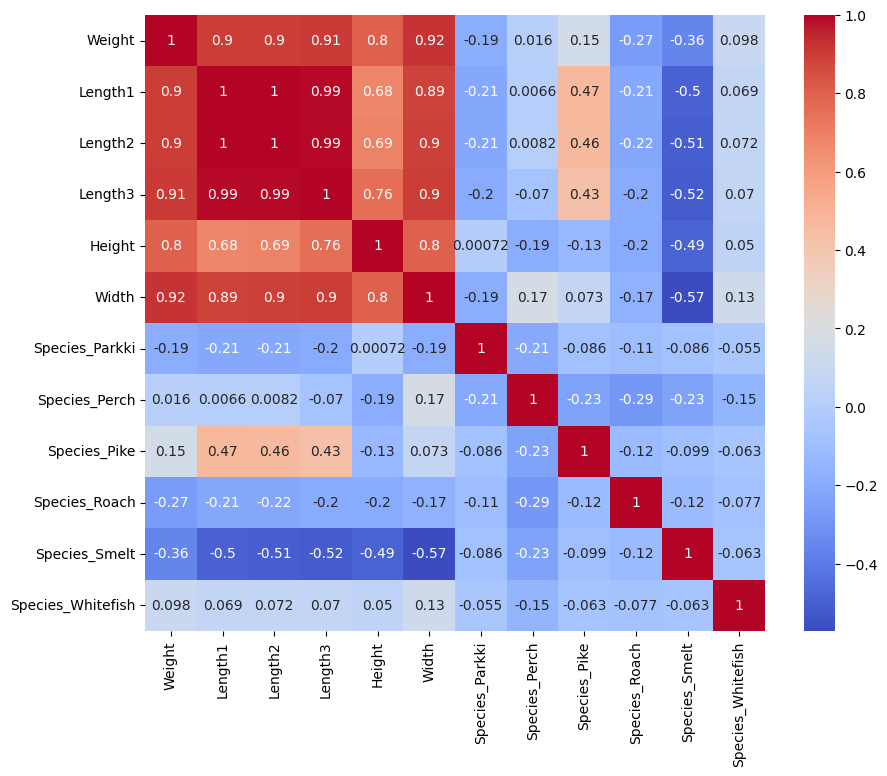

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.show()


In [45]:
X = df_clean.drop("Weight", axis=1)
y=df_clean['Weight']

In [46]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)


In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape


(124, 77)

In [48]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [49]:
y_pred = model.predict(X_test_scaled)


In [50]:
print(y_pred)

[ 208.01571322  215.74629057  111.06142063   50.38339434  681.70361963
  826.78401581   67.05869738  363.43357483  136.26922644  667.98772908
  640.56127221  113.42226977  626.59237271 1002.55302244  711.31413833
  931.92311617  897.15752328  198.92556816   10.58055657   62.53092086
  203.11160853  600.36579764  415.67483869  506.55034063  922.7230433
  241.26606137  188.47291228  128.75182301  181.97303265  170.64589147
  147.44852298    8.23153919]


In [51]:
mae = mean_absolute_error(y_test, y_pred)


In [57]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [58]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 35.83818687077697
MSE: 3068.8479792804833
RMSE: 55.39718385694785
R2 Score: 0.9706437006956286


In [62]:
c=model.intercept_
print(c)

367.4822580644768


In [63]:
m=model.coef_
print(m)

[ 5.65806520e+03 -5.44593067e+03 -1.64341315e+03 -3.78287291e+02
  1.21392496e+03 -1.13342055e+02 -2.67663838e+02 -2.37101574e+02
 -2.02374324e+02 -1.91583186e+02 -2.10025018e+02  8.53369545e+03
 -3.33864609e+04  1.18564243e+03 -7.30060896e+03  1.57358807e+04
 -2.06436191e+03 -5.58659423e+03 -8.66217528e+00 -2.75906556e+03
 -1.31260450e+03 -3.67513201e+03 -3.79940838e+03  6.30566966e+04
 -5.33482822e+03 -9.71987515e+03  2.42619329e+03  4.41147679e+03
 -4.33240686e+03  1.21214772e+03  9.50406145e+02  2.28848670e+03
 -3.63568471e+04  1.76786674e+04 -7.78206719e+03  1.26794264e+01
  2.70605366e+03  6.45656432e+03  2.66371269e+03  8.90903447e+02
  2.80859184e+03 -2.10418377e+03 -4.74700063e+02  1.50015441e+02
  4.66707910e+01 -7.66048402e+02 -2.60097243e+02 -3.80188510e+01
 -8.78130718e+02  7.97242145e+02 -3.58340178e+02 -1.23572588e+03
 -3.52430990e+02 -5.33234881e+02 -2.38111791e+02 -1.46324573e+02
 -1.13342055e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [73]:
feature_names = poly.get_feature_names_out(X.columns)
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_
})

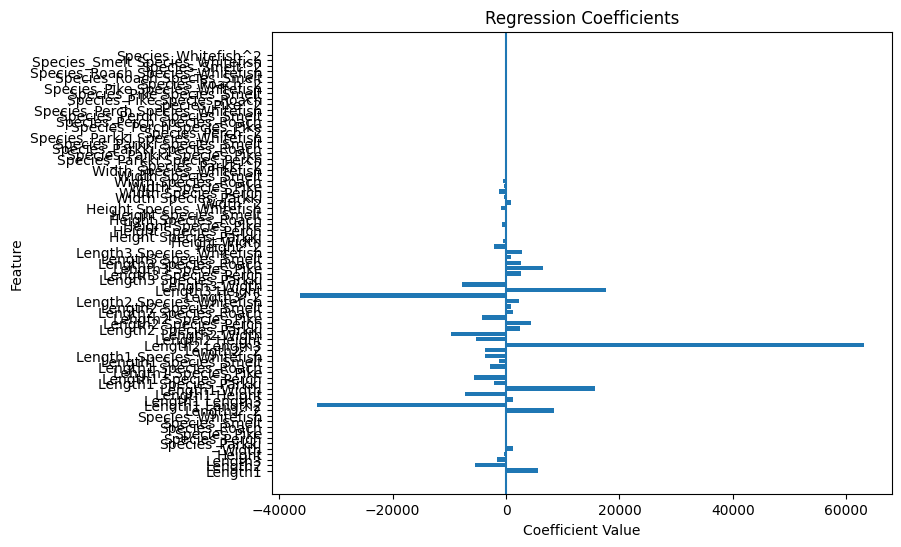

In [74]:
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Regression Coefficients")
plt.axvline(0)   # reference line
plt.show()


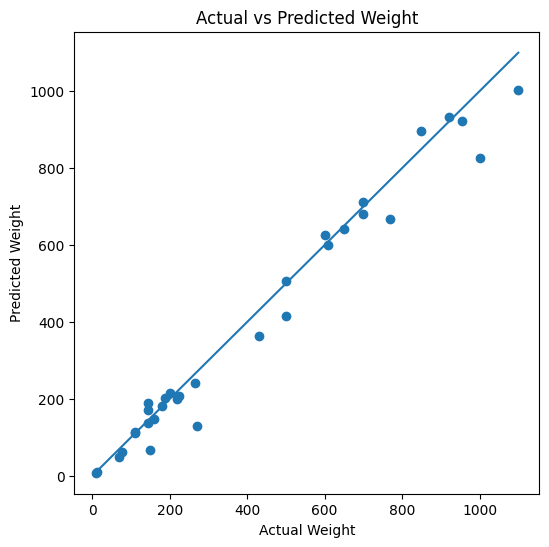

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.show()


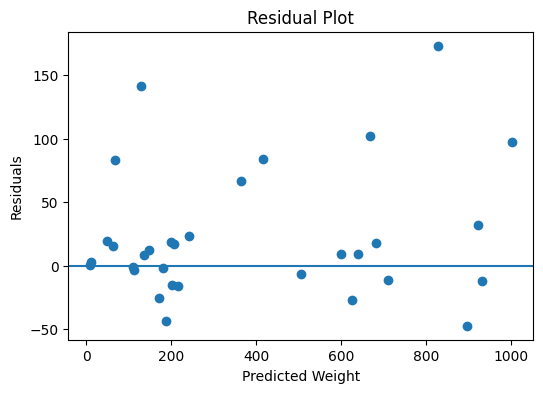

In [60]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Weight")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


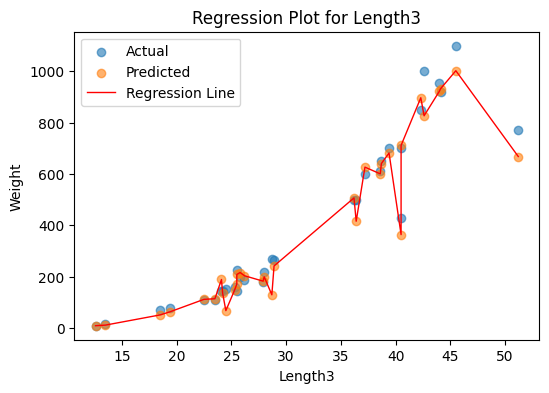

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Extract Length3 (column index = 2)
x = X_test[:, 2]

# Sort values for smooth line
sorted_idx = np.argsort(x)
x_sorted = x[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(6,4))

# Scatter points
plt.scatter(x, y_test, label="Actual", alpha=0.6)
plt.scatter(x, y_pred, label="Predicted", alpha=0.6)

# Regression line
plt.plot(x_sorted, y_pred_sorted,color='red', linewidth=1, label="Regression Line")

plt.xlabel("Length3")
plt.ylabel("Weight")
plt.title("Regression Plot for Length3")
plt.legend()
plt.show()
